In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
iris = load_iris()

In [3]:
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0


In [4]:
#for i in range(len(iris.target)):
#    print("Example %d: label %s, features %s" % (i, iris.target[i], iris.data[i]) )

In [5]:
test_idx = [0,50,100]

training data

In [6]:
training_target = np.delete(iris.target, test_idx)
train_data = np.delete(iris.data, test_idx, axis=0)

testing data

In [7]:
test_target = iris.target[test_idx]
test_data = iris.data[test_idx]

Generate random data for decision tree

In [8]:
# train_data = np.random.randn(1000,2)
# training_target = np.greater(train_data[:,0], train_data[:,1])
# test_data = np.random.randn(100,2)
# test_target = np.greater(test_data[:,0], test_data[:,1])
model = tree.DecisionTreeClassifier()
model.fit(train_data, training_target)
# print(test_target)
# print(model.predict(test_data))
# model.score(train_data, training_target)
# test_data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Visualization

In [9]:
from sklearn.externals.six import StringIO
import pydotplus

In [10]:
dot_data = StringIO()
tree.export_graphviz(model, 
                    out_file=dot_data,
                    feature_names=iris.feature_names,
                    class_names=iris.target_names,
                    filled=True, rounded=True,
                    impurity=False)

In [11]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [12]:
graph.write_pdf("iris.pdf")

True

In [13]:
!open iris.pdf

In [15]:
!workon BigData

/bin/sh: workon: command not found


# Visualization with dtreeviz

In [14]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg

ModuleNotFoundError: No module named 'dtreeviz'

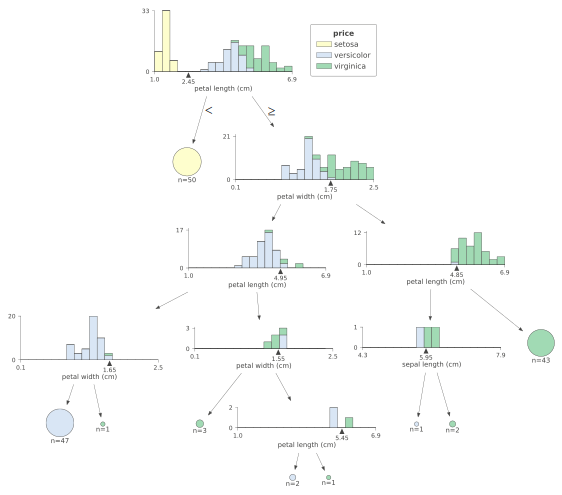

In [46]:
clas = tree.DecisionTreeClassifier(max_depth=5)  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked')  # barstackes is default
viz.save("iris.svg")
viz

In [48]:
clas.score(X_train, y_train)

1.0